# FIO plots

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def search_log(filename):
    '''
    Function to read bytes from a file
    '''
    header = ["Timestamp", "server1", "server2"]
    flow = pd.read_csv(filename, delimiter='\s+',index_col = 0, names = header)
    a=flow.to_numpy()
    flow_node=0
    for i in range(len(a[0])):
        if a.mean(0)[i]!=a[0,i]:
            flow_node+= sum(a[:,i])
    return flow_node

In [3]:
def bw_ios3(filename, fiorw, option):
    '''
    Function to read BW or IOPS from a json file
    
    Input:
        filaname :: json name file (include the path)
        fio      :: read, write, etc.
        option   :: iops, bw_bytes, runtime, etc. 
    NOTE: All the inputs are str type.
    '''
    with open(filename) as f:
        data = json.load(f)
    return data['jobs'][0][fiorw][option]

In [4]:
def plot_bw_iops3(HOME, nodes, fiojobs):
    '''
    Function to plot total BW & IOPS using HOME files for n nodes and n fio_jobs
    '''
    #Plot environment
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))

    for fjob in fiojobs:
        total_flow = []
        total_fio_bw_r = []
        total_fio_bw_w = []
        total_fio_iops_r = []
        total_fio_iops_w = []
        
        for node in nodes:
            path=HOME+str(node)+'_node/'
            content=os.listdir(path)
            fiojob = [s for s in content if "fiojob_"+str(fjob) in s]
            
            if len(fiojob)>1:
                if len(fiojob[0])<len(fiojob[1]): fiojob=fiojob[0]
                else: fiojob = fiojob[1]
            else:
                fiojob= fiojob[0]
            
            flow_node = 0
            fio_bytes_r, fio_bytes_w = 0, 0 
            fio_iops_r, fio_iops_w   =  0, 0
            
            for folder in os.listdir(path+fiojob):
                #print(path+fiojob+"/"+folder)
                flow_node+= search_log(path+fiojob+"/"+folder+"/netlogs")*1e-6                         #in Mb/s
                fio_bytes_r += bw_ios3(path+fiojob+"/"+folder+"/output.json","read", 'bw_bytes')*1e-6  #in Mb/s
                fio_bytes_w += bw_ios3(path+fiojob+"/"+folder+"/output.json","write", 'bw_bytes')*1e-6 #in Mb/s
                fio_iops_r += bw_ios3(path+fiojob+"/"+folder+"/output.json", "read", 'iops')*1e-3  #in k
                fio_iops_w += bw_ios3(path+fiojob+"/"+folder+"/output.json", "write", 'iops')*1e-3 #in k
            total_flow.append(flow_node)
            total_fio_bw_r.append(fio_bytes_r)
            total_fio_bw_w.append(fio_bytes_w)
            total_fio_iops_r.append(fio_iops_r)
            total_fio_iops_w.append(fio_iops_w)
            
        #plt.plot(nodes,total_flow, '--',label='fio_tjob='+str(fjob))
        ax[0,0].plot(nodes,total_fio_bw_r,'o--',label='fio_job='+str(fjob))
        ax[1,0].plot(nodes,total_fio_iops_r,'o--',label='fio_job='+str(fjob))
        
        ax[0,1].plot(nodes,total_fio_bw_r,'o--',label='fio_job='+str(fjob))
        ax[1,1].plot(nodes,total_fio_iops_w,'o--',label='fio_job='+str(fjob))

    ax[0,0].legend()
    ax[0,0].set_xticks(nodes)
    ax[0,0].set_xlabel('nodes')
    ax[0,0].set_ylabel('MB/s')
    ax[0,0].set_title("READ: Bandwidth vs. n nodes")

    #ax[1,0].legend()
    ax[1,0].set_xticks(nodes)
    ax[1,0].set_xlabel('nodes')
    ax[1,0].set_ylabel('kIOPS')
    ax[1,0].set_title("READ: IOPS vs. n nodes")
    
    #ax[0,1].legend()
    ax[0,1].set_xticks(nodes)
    ax[0,1].set_xlabel('nodes')
    ax[0,1].set_ylabel('MB/s')
    ax[0,1].set_title("WRITE: Total Bandwidth vs. n nodes")

    #ax[1,1].legend()
    ax[1,1].set_xticks(nodes)
    ax[1,1].set_xlabel('nodes')
    ax[1,1].set_ylabel('kIOPS')
    ax[1,1].set_title("WRITE: IOPS vs. n nodes")
    
    plt.show()

# Rand_read_write plot

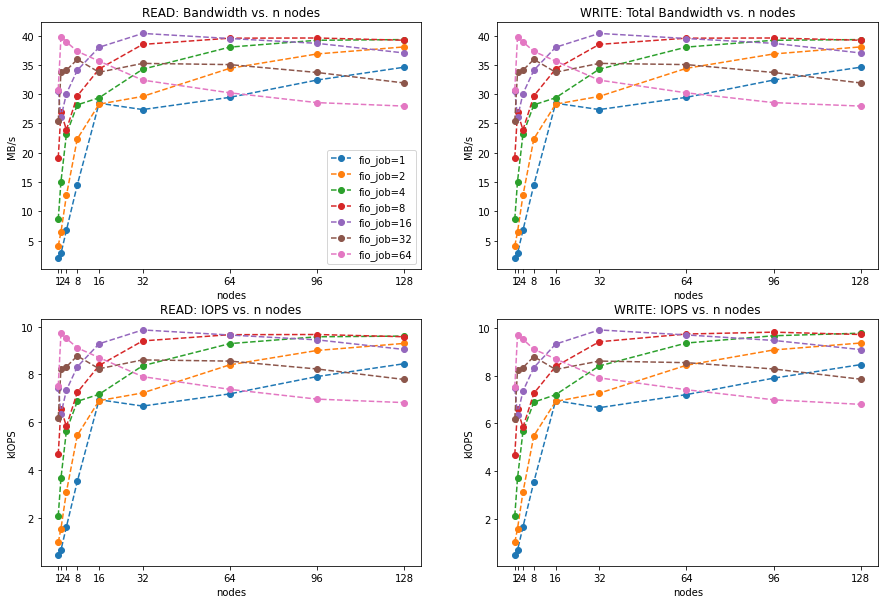

In [5]:
# Randrw
HOME_randrw = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/randrw/"
#nodes = [1, 2, 4, 8, 16, 32,  64, 96, 128, 150]
fiojobs = [1,2,4, 8, 16, 32, 64]#, 16, 32, 64]
nodes= [1,2, 4, 8, 16,32, 64, 96, 128]

plot_bw_iops3(HOME_randrw, nodes, fiojobs)